# Music Year Prediction

## Importación de librerías

Iniciamos este miniproyecto importando las librerías necesarias para el desarrollo de este.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, LSTM
from keras.optimizers import SGD, RMSprop, Nadam, Adam
from keras.optimizers.schedules import ExponentialDecay
from scikeras.wrappers import KerasRegressor, KerasClassifier
import warnings
warnings.filterwarnings('ignore')

## Cargue de datos

Luego de haber importado las librerías, procedemos a cargar los datos que utilizaremos para realizar el análisis exploratorio de datos y la construcción de modelos de redes neuronales que veremos más adelante.

In [3]:
dataTraining = pd.read_csv('https://raw.githubusercontent.com/oapatinop/DL_miniproyecto/main/trainReg.csv')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/oapatinop/DL_miniproyecto/main/testReg.csv')

## Encabezado datos de entrenamiento y prueba

Después del cargue de los datos, mostramos el encabezado de estos. Sin embargo, antes de hacer esto, configuramos la columna **ID** como índice tanto en el dataframe de entrenamiento como de prueba. Adicionalmente, en ambas se remueve la columna **V3**.

In [4]:
dataTraining = dataTraining.set_index('ID').drop('V3', axis=1)
dataTraining.head()

,Y,V1,V2,V4,V5,V6,V7,V8,V9,V10,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
ID,,,,,,,,,,,,,,,,,,,,,
1,2013,44.81144,0.83826,7.91314,10.94148,-0.04547,-15.16332,-10.47324,14.17212,10.57382,...,-8.44873,-230.30484,-40.94698,48.20025,-0.28694,155.76251,-56.23579,13.62599,123.92018,10.02845
2,1998,41.99180,7.99976,64.26707,16.54115,-9.28737,-40.73524,33.60440,9.18802,-6.79144,...,18.68972,-44.06062,52.37792,81.36093,-14.81111,151.66273,-120.61213,10.57519,-3.21078,-1.07438
3,1998,42.19196,2.23111,65.07719,24.99746,1.76100,6.66573,3.45778,-24.42779,-18.45069,...,-3.69878,-118.95712,54.15529,-23.32168,-9.65067,-83.83055,-141.17594,7.33084,-275.69714,2.35522
4,1998,39.28634,-1.85716,91.04190,9.08333,0.08502,-5.59216,65.62463,8.33105,11.70269,...,20.89044,-18.53135,176.09769,351.33669,3.44682,121.69156,-270.43989,12.51659,-140.88884,-0.23476
5,1998,40.36025,2.94918,53.83723,13.71369,-8.21964,-40.21636,21.22366,17.16742,0.14463,...,19.91979,34.59026,-69.83720,102.31946,8.08807,135.08089,-153.02327,4.09207,-68.33046,-6.19159


In [5]:
dataTesting = dataTesting.set_index('ID').drop('V3', axis=1)
dataTesting.head()

,V1,V2,V4,V5,V6,V7,V8,V9,V10,V11,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
ID,,,,,,,,,,,,,,,,,,,,,
5972,35.74170,0.86615,1.44450,-13.87834,-9.57602,5.89475,-4.46036,-10.60501,-2.20779,-31.56674,...,10.78210,-183.63792,131.18868,37.68626,-4.48926,10.98139,-48.14549,-7.27992,-54.52826,4.81414
57116,35.31664,-0.47799,-12.27958,-29.32847,-2.38610,-7.27386,-1.87712,-3.74953,-3.38237,1.54788,...,53.92478,-238.77713,134.28149,81.19403,-4.81669,106.00178,3.34940,2.72328,156.94894,-8.44873
29076,43.25032,-6.31920,-2.56469,-7.59368,2.12862,23.29535,-0.34225,4.48761,4.93676,33.62086,...,40.95711,-269.59803,69.88747,29.65701,-0.12854,106.92919,-62.86550,30.12278,24.39843,-10.68316
83358,44.94220,-4.12303,-15.79205,7.15794,1.46007,-3.38280,-8.48270,12.69732,-1.68102,3.62442,...,0.81574,-243.09497,24.20334,-10.02719,19.25667,66.15602,-64.78646,9.09148,11.46055,-7.12136
84664,50.40813,-1.52061,-10.10142,-17.74876,-5.96768,-29.94136,-11.84237,5.90144,3.95996,6.07786,...,-3.58634,-61.67109,47.53814,139.04916,6.85904,-57.09356,-49.57683,-6.61453,22.55497,-4.39272


## Análisis exploración de datos

### Dimensiones del conjunto de datos y estadísticas descriptivas

In [6]:
dTr = dataTraining.copy()
display(dTr.describe().T)
print('\n Dimensiones del conjunto de datos')
print(dTr.shape)
print('\n Rango de la media de los variables')
print(dTr.describe().T['mean'].min(), dTr.describe().T['mean'].max())
print('\n Variable con la media más pequeña')
print({dTr.describe().T[dTr.describe().T['mean'] == dTr.describe().T['mean'].min()].index[0]: dTr.describe().T['mean'].min()})
print('\n Variable con la media más grande')
print({dTr.describe().T[dTr.describe().T['mean'] == dTr.describe().T['mean'].max()].index[0]: dTr.describe().T['mean'].max()})

,count,mean,std,min,25%,50%,75%,max
Y,77779.0,2002.308129,10.811038,1926.00000,1998.000000,2006.00000,2010.000000,2014.00000
V1,77779.0,43.425185,6.128869,4.83688,40.060315,44.32385,47.900080,60.03401
V2,77779.0,-0.136720,4.370466,-69.68087,-2.612435,-0.06300,2.465950,23.81526
V4,77779.0,3.755313,17.609183,-165.22161,-7.016240,2.02210,12.776450,274.65858
V5,77779.0,-2.339768,14.483975,-121.47534,-10.685075,-2.05456,6.423900,160.81522
...,...,...,...,...,...,...,...,...
V86,77779.0,17.575097,115.243644,-3168.92457,-31.569390,15.23736,67.361475,2144.10391
V87,77779.0,-25.628857,173.310304,-4319.99232,-100.668480,-21.58164,51.333150,2833.60895
V88,77779.0,4.463484,13.526414,-236.03926,-2.569360,3.13690,10.002145,275.35366
V89,77779.0,18.664885,186.690183,-7458.37815,-60.121980,5.94149,84.389125,5289.11138



 Dimensiones del conjunto de datos
(77779, 90)

 Rango de la media de los variables
-191.30189603273377 2419.778632412219

 Variable con la media más pequeña
{'V39': -191.30189603273377}

 Variable con la media más grande
{'V14': 2419.778632412219}


El resultado anterior nos permite ver que las dimensiones del conjuntos de datos son de 77779 filas y 90 columnas, en donde la variable de respuesta está representada por la variable **Y**, mientras que las demás variables, las cuales empiezan por la letra **V** son las variables predictoras. Por otro lado, podemos observar que el rango de la media de las variables del conjunto de datos se encuentra entre -191 y 2419, en donde el primer valor corresponde a la variable **V39** y el segundo a **V14**.

### Valores nulos

In [7]:
sum(dTr.isnull().sum() / dTr.shape[0] * 100)

0.0

El resultado arrojado indica que no hay valores nulos en el conjunto de datos.

### Histogramas

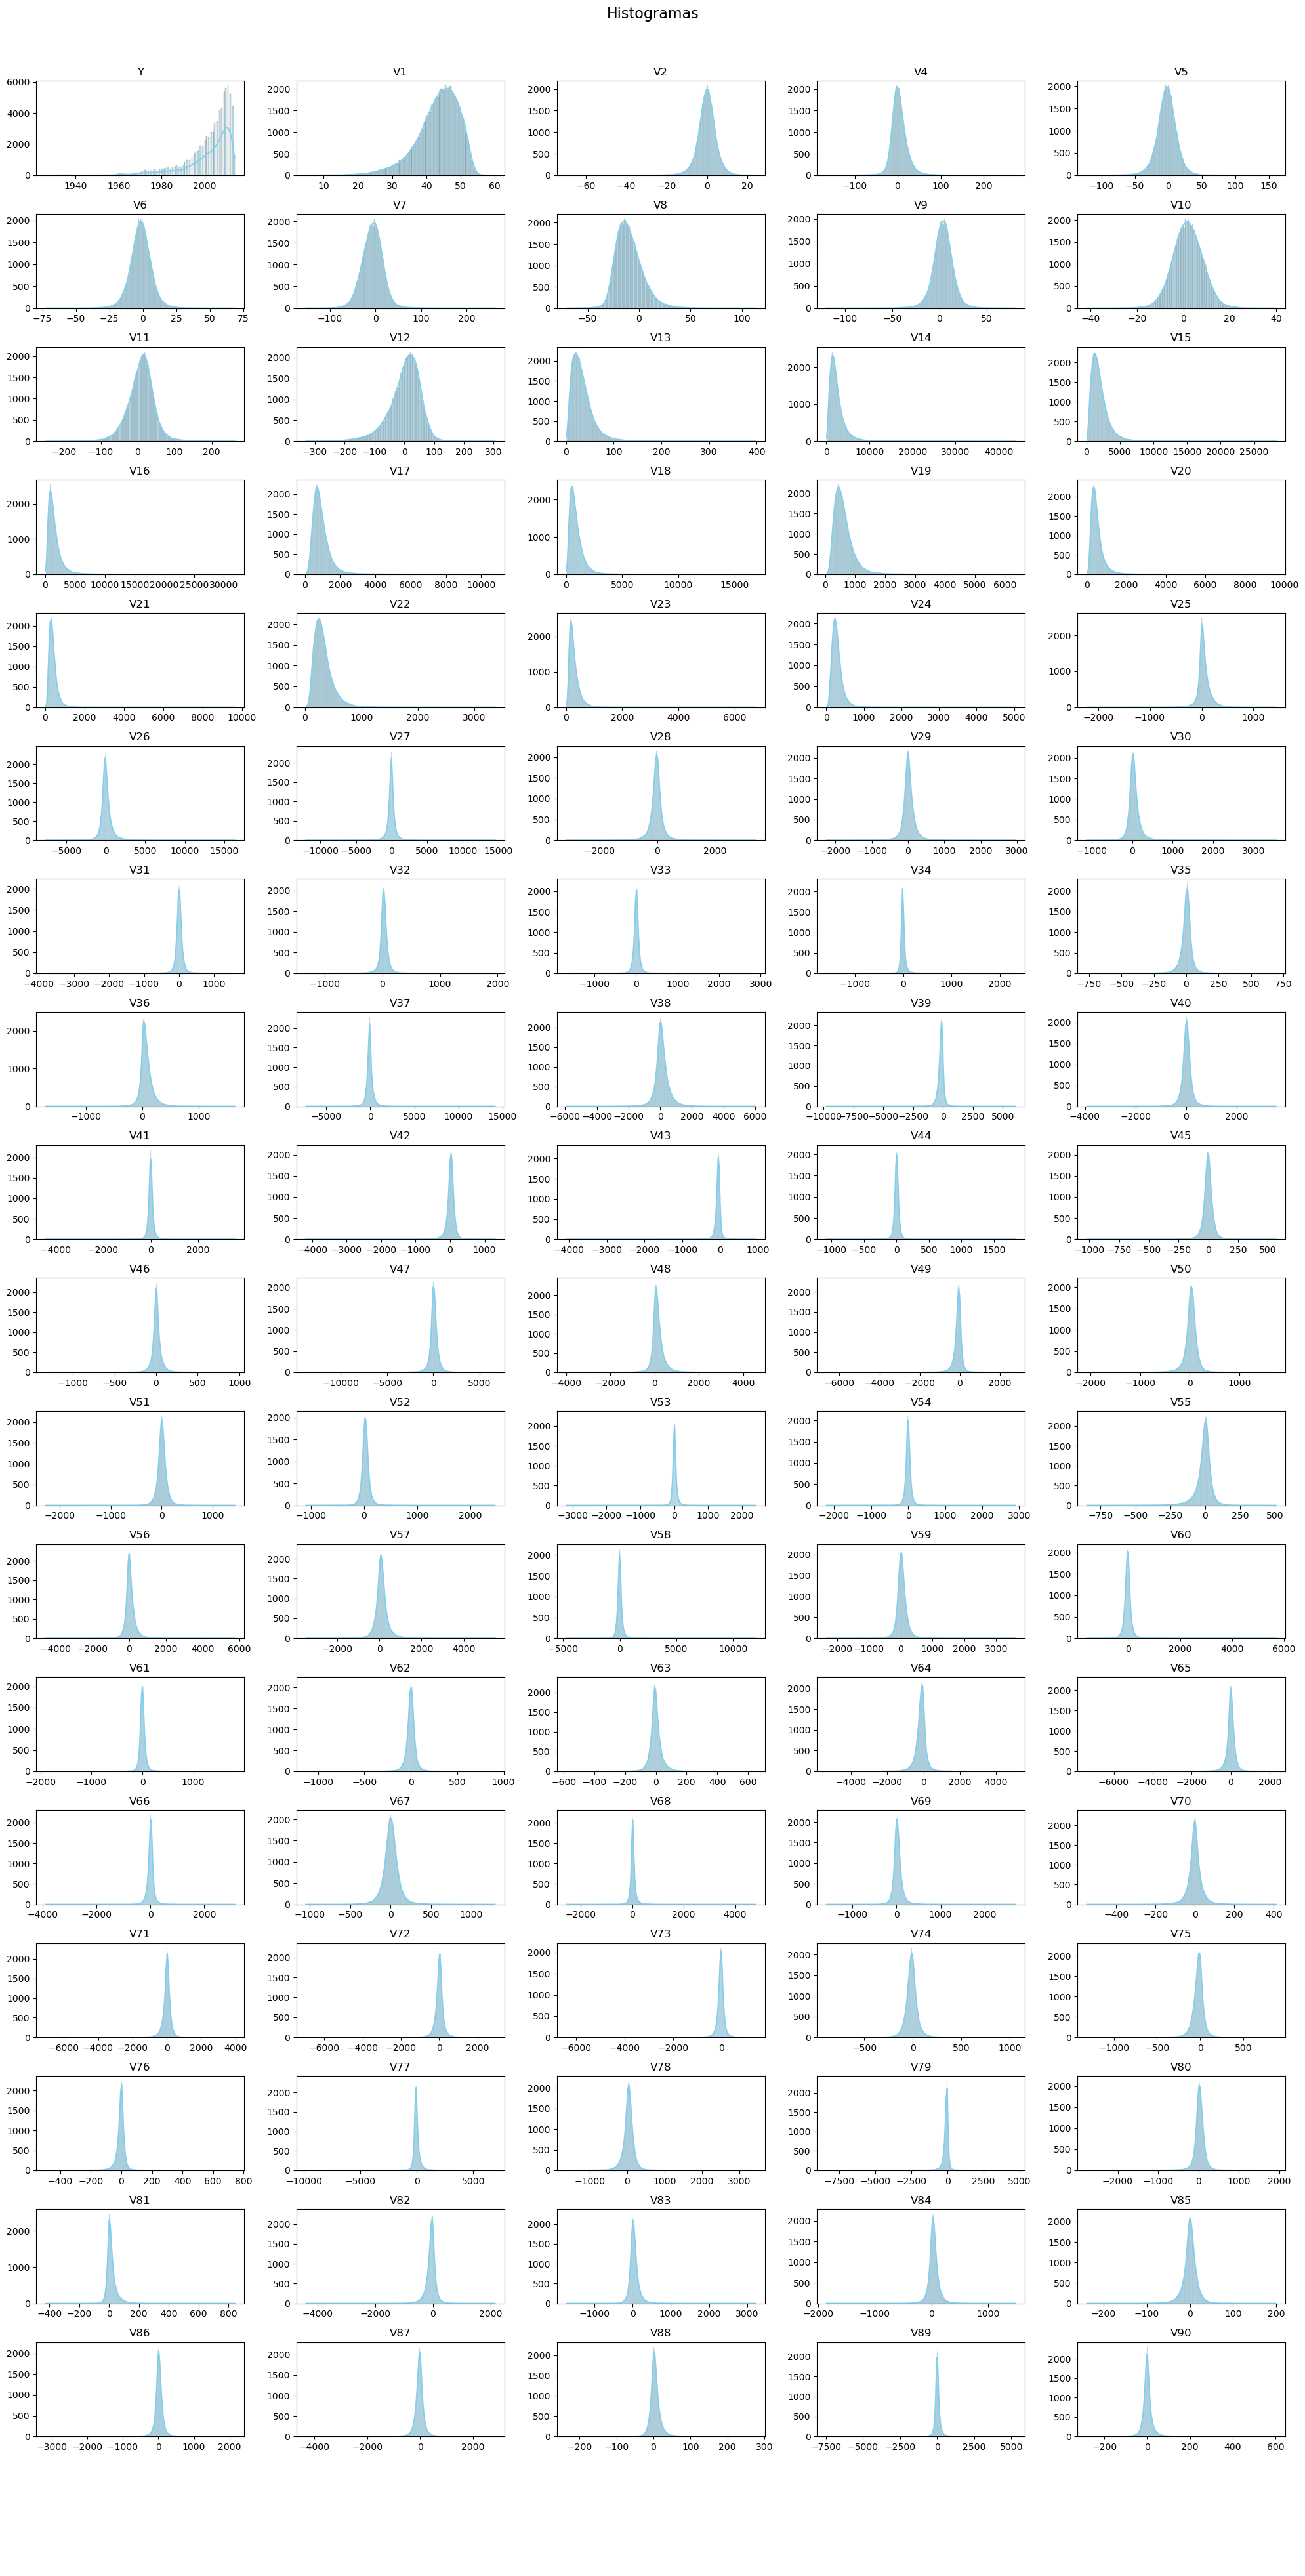

In [8]:
fig, axes = plt.subplots(19, 5, figsize=(20, 40))
fig.suptitle('Histogramas', fontsize=16)

axes = axes.flatten()
for i, col in enumerate(dTr.columns):
    sns.histplot(dTr[col], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for i in range(len(dTr.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Los histogramas anteriores reflejan que hay variables que muestran asimetrías positivas y negativas en los datos y unas cuantas presentan una distribución similar a una normal.

### Boxplots

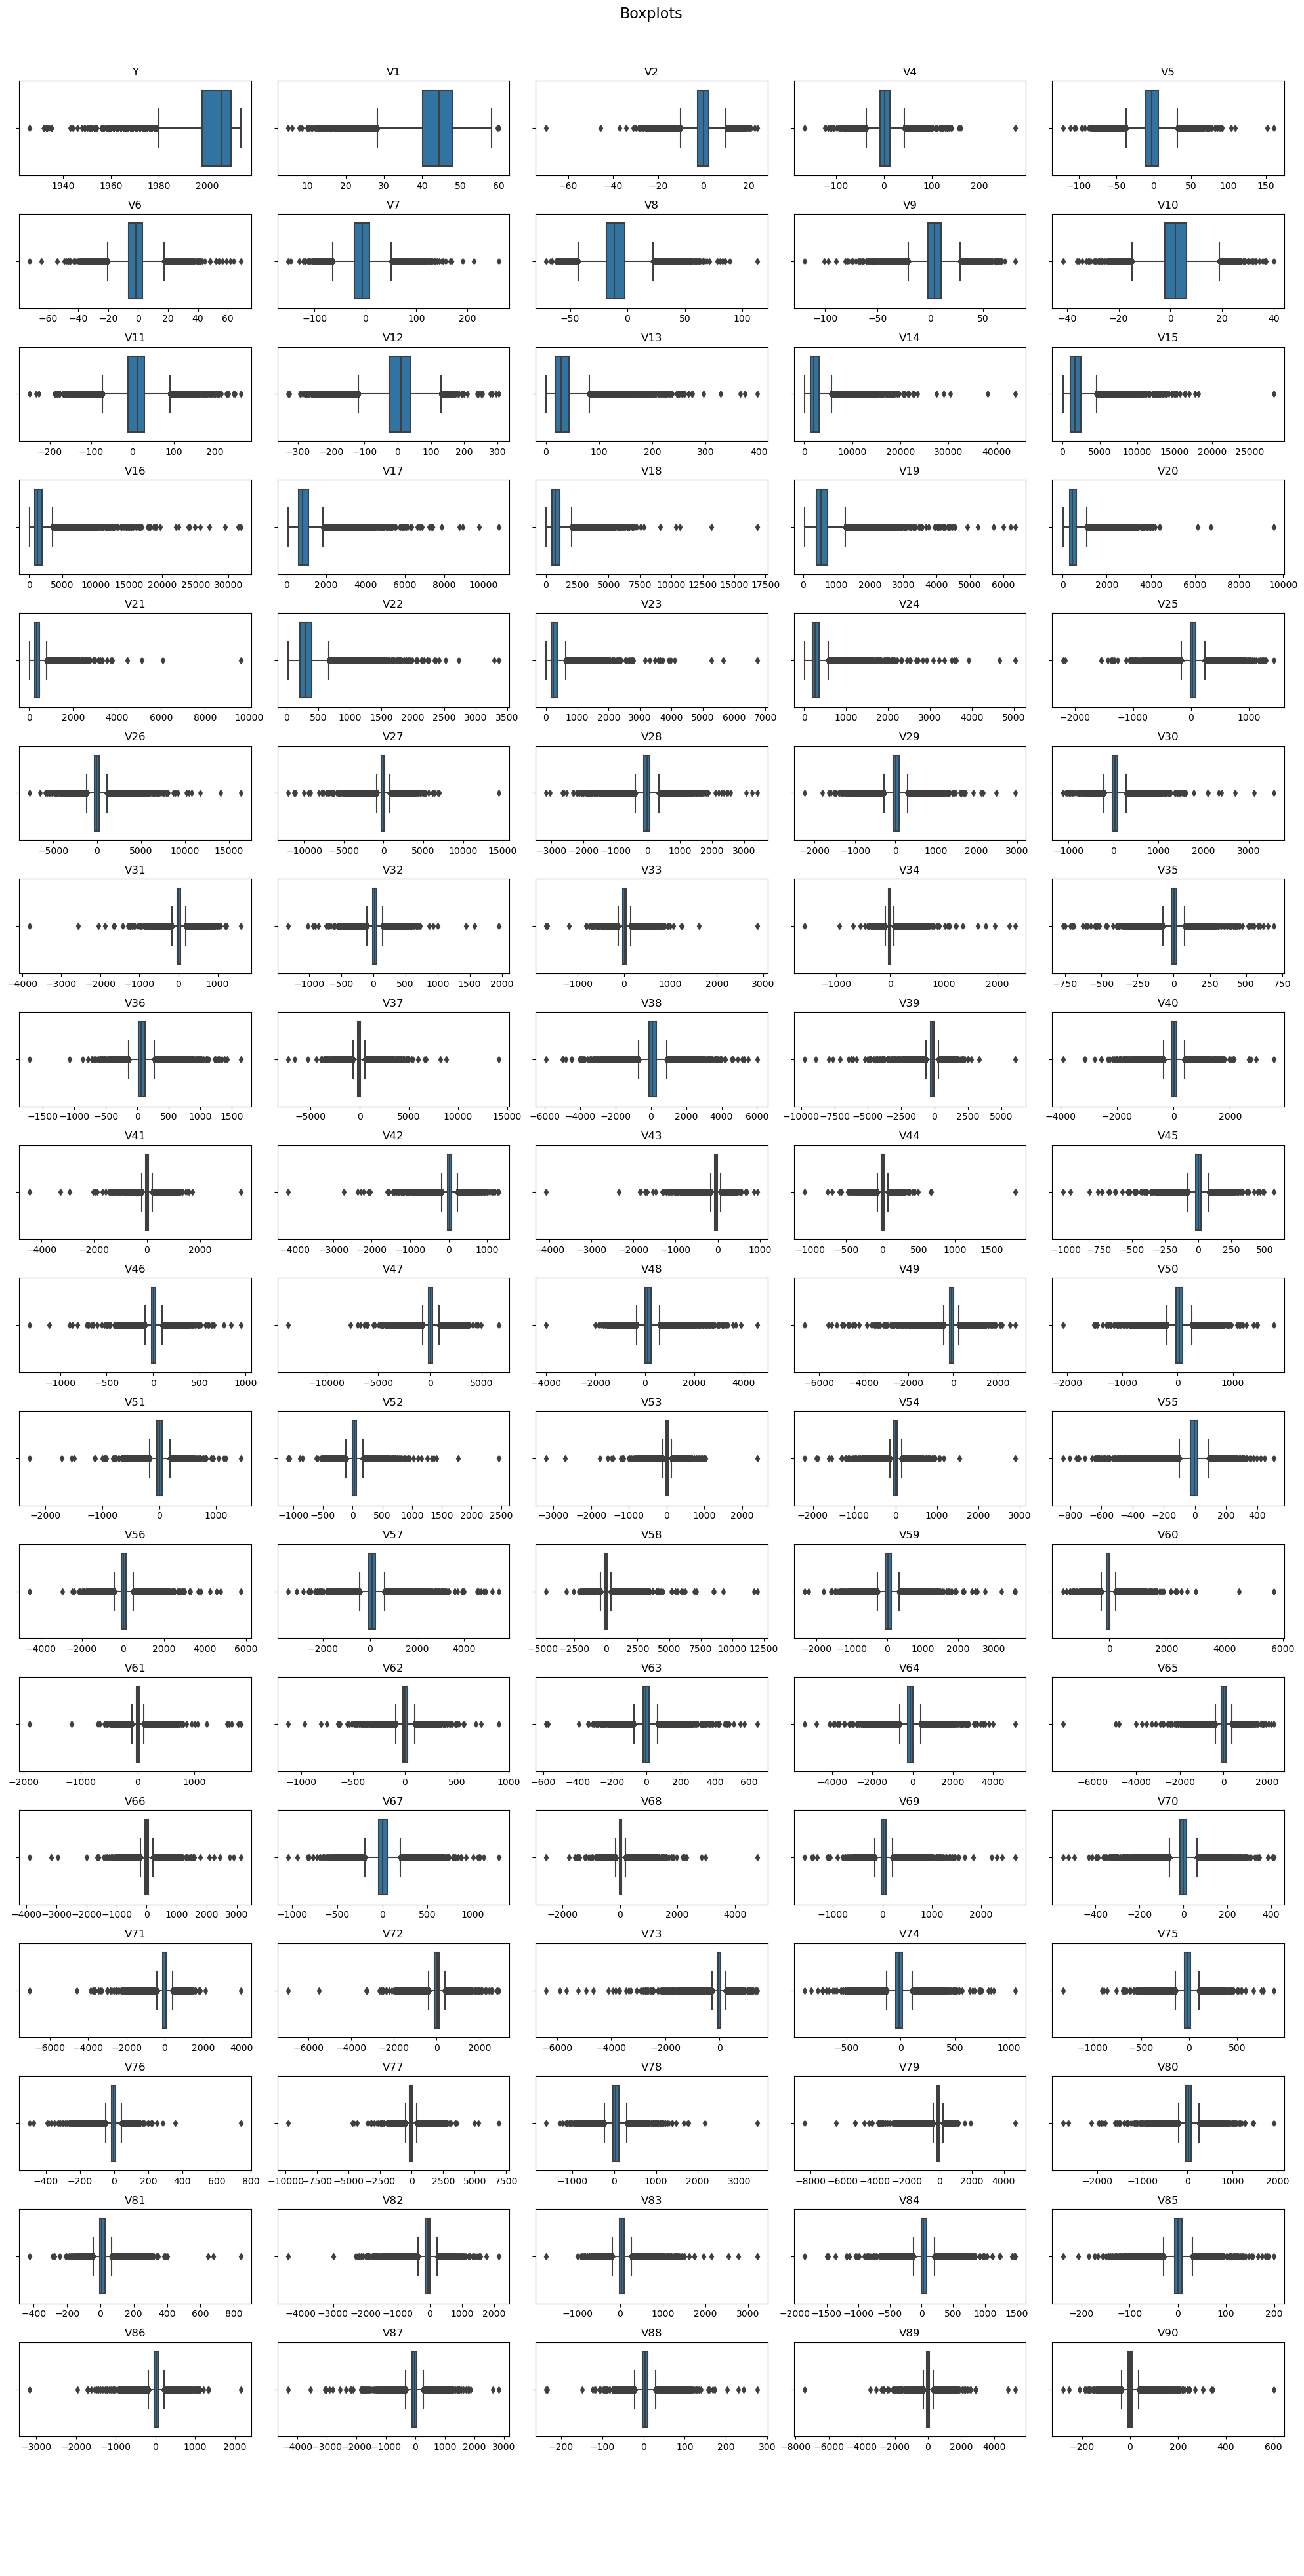

In [9]:
fig, axes = plt.subplots(19, 5, figsize=(20, 40))
fig.suptitle('Boxplots', fontsize=16)

axes = axes.flatten()
for i, col in enumerate(dTr.columns):
    sns.boxplot(x=dTr[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for i in range(len(dTr.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Al observar los diagramas de cajas anteriores, podemos concluir que todas las variables muestran outliers o valores atípicos en sus datos.

### Matriz de correlación

In [10]:
correlation_matrix = dTr.corr()

high_corr_threshold = 0.7
high_corr_pairs = []

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            corr_value = correlation_matrix.loc[col1, col2]
            if abs(corr_value) > high_corr_threshold:
                high_corr_pairs.append((col1, col2, corr_value))

low_corr_threshold = -0.7
low_corr_pairs = []

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            corr_value = correlation_matrix.loc[col1, col2]
            if abs(corr_value) < low_corr_threshold:
                low_corr_pairs.append((col1, col2, corr_value))

print('Pares de variables con alta correlación positiva:')
for col1, col2, corr_value in high_corr_pairs:
    print(f'Pareja: {col1} - {col2}, Correlación: {corr_value:.2f}')

print('\nPares de variables con alta correlación negativa:')
for col1, col2, corr_value in low_corr_pairs:
    print(f'Pareja: {col1} - {col2}, Correlación: {corr_value:.2f}')

total_pairs = len(high_corr_pairs) + len(low_corr_pairs)
print(f'\nTotal de pares de variables: {total_pairs}')

Pares de variables con alta correlación positiva:
Pareja: V16 - V18, Correlación: 0.81
Pareja: V16 - V20, Correlación: 0.73
Pareja: V16 - V23, Correlación: 0.84
Pareja: V18 - V16, Correlación: 0.81
Pareja: V18 - V22, Correlación: 0.72
Pareja: V18 - V23, Correlación: 0.86
Pareja: V20 - V16, Correlación: 0.73
Pareja: V20 - V22, Correlación: 0.87
Pareja: V20 - V23, Correlación: 0.71
Pareja: V22 - V18, Correlación: 0.72
Pareja: V22 - V20, Correlación: 0.87
Pareja: V22 - V23, Correlación: 0.72
Pareja: V23 - V16, Correlación: 0.84
Pareja: V23 - V18, Correlación: 0.86
Pareja: V23 - V20, Correlación: 0.71
Pareja: V23 - V22, Correlación: 0.72

Pares de variables con alta correlación negativa:

Total de pares de variables: 16


Debido a que son muchas variables, al final se decidió mostrar solo aquellos pares de variables que tuvieran alta correlación, sea positiva o negativa. El resultado indica que hay 16 pares de variables con alta correlación, en donde todas ellas muestran alta correlación positiva y ninguna negativa.

## Preparación de datos

Ahora, prepararemos los datos, definiendo la variable de respuesta y las variables predictoras.

In [9]:
XTotal = dTr.loc[:,dTr.columns!='Y']
yTotal = dTr.loc[:,dTr.columns=='Y']

Una vez definido las variables predictoras y de respuesta, normalizamos las primeras con el fin de que se encuentren en una misma escala.

In [10]:
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(XTotal)
XTotalS=scaler.transform(XTotal)
dTestS=scaler.transform(dataTesting)

Después de haber escalado las variables predictoras, dividimos el conjunto de datos en un set de entrenamiento y de prueba.

In [11]:
XTrain, XTest, yTrain, yTest = train_test_split(XTotalS, yTotal, test_size=0.30, random_state=3)

## Análisis preliminar de selección de modelos

Antes de implementar los modelos, definiremos las siguientes dos funciones las cuales nos permitirán guardar las predicciones de los modelos en la estructura requerida por la competencia de kaggle y calcular las métricas del RMSE y el MSE.

In [12]:
def guardar(ypred, nombre):

    ypred = pd.DataFrame(ypred,index=dataTesting.index, columns=['Y'])

    # Guardar las predicciones en el formato exigido por la competencia de kaggle
    archivo = 'Resultados/' + nombre + '.csv'
    ypred['Y'] = round(ypred['Y'])
    ypred.to_csv(archivo, index_label='ID')
    
    return ypred

In [13]:
def calculo_rmse(ypred,yTest,ypredTr,yTrain):

    RMSE = round(mse(np.round(ypred), yTest, squared=False), 4)
    MSE = round(mse(np.round(ypred), yTest), 4)

    RMSE_Tr = round(mse(np.round(ypredTr), yTrain, squared=False), 4)
    MSE_Tr = round(mse(np.round(ypredTr), yTrain),4)
        
    # Cálculo del desempeño del modelo utilizando el RMSE y el MAE
    print(f'El RMSE del modelo es de {RMSE}')
    print(f'El MSE del modelo es de {MSE}')

    print(f'El RMSE del modelo en train es de {RMSE_Tr}')
    print(f'El MSE del modelo en train es de {MSE_Tr}')
    
    # Retornamos el cálculo del desempeño del modelo utilizando el RMSE y el MSE
    return {'RMSE': RMSE, 'MSE': MSE, 'RMSE Train': RMSE_Tr, 'MSE Train': MSE_Tr}

### Modelos de redes neuronales utilizando keras

#### Keras 1

En este modelo, empezaremos definiendo la arquitectura de la red neuronal, en donde añadiremos una capa densa a la red con 128 neuronas, una dimensión de entrada igual al número de variables predictoras y una función de activación **sigmoid**. Luego, agregaremos una capa de normalización por lotes y, después, otra capa densa con 128 neuronas con una función de activación **sigmoid**. Terminaremos esta parte incorporando la capa de salida con una sola neurona.

Una vez creemos la arquitectura de la red neuronal, compilaremos el modelo especificando el optimizador **adam**, la función de pérdidad **mean_squared_error** y la métrica que queremos observar, que en este caso también es el error cuadrático medio.

Después, entrenaremos el modelo con los datos de train con 150 épocas y estableciendo un tamaño de lote igual que 64, y, finalmente, evaluaremos el desempeño del modelo con el RMSE y el MSE.

In [91]:
# Definición del modelo
knn1 = Sequential()
knn1.add(Dense(64, input_dim=XTrain.shape[1], activation='sigmoid'))
knn1.add(BatchNormalization(momentum=0.9))
knn2.add(Dropout(0.2))
knn1.add(Dense(64, activation='relu'))
knn1.add(Dense(1))

# Compilación del modelo
knn1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Entrenamiento del modelo
knn1.fit(XTrain, yTrain.to_numpy(), epochs=100, batch_size=128)

Epoch 1/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3606458.5000 - mean_squared_error: 3606458.5000
Epoch 2/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 511729.7500 - mean_squared_error: 511729.7500
Epoch 3/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 234885.2031 - mean_squared_error: 234885.2031
Epoch 4/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 180764.8594 - mean_squared_error: 180764.8594
Epoch 5/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 96411.1484 - mean_squared_error: 96411.1484
Epoch 6/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31218.3008 - mean_squared_error: 31218.3008
Epoch 7/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18698.8008 - mean_squared_error: 18698.8008
Epoch 8/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16687.0898 - mean_squared_error: 16687.0898
Epoch 9/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16305.6201 - mean_squared_error: 16305.6201
Epoch 10/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [92]:
# Evaluación del modelo
keras1 = knn1.predict(XTest)
keras1Tr = knn1.predict(XTrain)
metrics_keras1 = calculo_rmse(keras1, yTest, keras1Tr, yTrain)

730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step
El RMSE del modelo es de 10.6109
El MSE del modelo es de 112.5918
El RMSE del modelo en train es de 9.8625
El MSE del modelo en train es de 97.2686


#### Keras 2

Para este nuevo modelo, iniciaremos definiendo la arquitectura de la red neuronal, en donde añadiremos una capa densa a la red con 128 neuronas, una función de activación **relu** y una dimensión de entrada igual al número de variables predictoras. Luego, agregaremos una capa de normalización por lotes y, después, una capa de **Dropout** con una tasa de abandono del 20%. Después, se vuelve a añadir otra capa densa con 128 neuronas con una función de activación **relu**. Una vez hecho esto, incorporaremos una capa de normalización por lotes, una capa de abandono del 20% y una capa densa de 128 neuronas y función de activación **relu**. Finalmente, añadiremos la capa de salida con una sola neurona.

Luego de crear la arquitectura de la red neuronal, compilaremos el modelo especificando solamente el optimizador **adam** y la función de pérdidad **mean_squared_error**.

Después, entrenaremos el modelo con los datos de train con 250 épocas y estableciendo un tamaño de lote igual que 128. Por último, evaluaremos el desempeño del modelo con el RMSE y el MSE.

In [123]:
# Definición del modelo
knn2 = Sequential()
knn2.add(Dense(128, activation='relu', input_shape=(XTrain.shape[1],)))
knn2.add(BatchNormalization())
knn2.add(Dropout(0.2))
knn2.add(Dense(128, activation='relu'))
knn2.add(BatchNormalization())
knn2.add(Dropout(0.2))
knn2.add(Dense(128, activation='relu'))
knn2.add(Dense(1))

# Compilación del modelo
opt = Adam(learning_rate=0.005)
knn2.compile(optimizer=opt, loss='mean_squared_error')

# Entrenamiento del modelo
knn2.fit(XTrain, yTrain.to_numpy(), epochs=125, batch_size=128)

Epoch 1/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1481796.6250
Epoch 2/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 26083.6211
Epoch 3/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 19532.1699
Epoch 4/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 16108.1982
Epoch 5/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13318.8389
Epoch 6/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 10884.4277
Epoch 7/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9837.0566
Epoch 8/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9264.9971
Epoch 9/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8597.4502
Epoch 10/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8332.0986
Epoch 11/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7659.4204
Epoch 12/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7299.2622
Epoch 13/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6816.9795
Epoch 14/125
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 602

In [124]:
# Evaluación del modelo
keras2 = knn2.predict(XTest)
keras2Tr = knn2.predict(XTrain)
metrics_keras2 = calculo_rmse(keras2, yTest, keras2Tr, yTrain)

730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step
El RMSE del modelo es de 8.7408
El MSE del modelo es de 76.4018
El RMSE del modelo en train es de 7.7211
El MSE del modelo en train es de 59.6157


In [187]:
kerasNN2=knn2.predict(dTestS)
#guardar(kerasNN2,'KerasNN2_3')

584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


#### Keras 3

La arquitectura del modelo **keras 3** es similar al modelo **keras 2**, en donde la diferencia radica en que las capas intermedias utilizan la función de activación **softmax** en lugar de **relu**.Por otro lado, en el optimizador se utilizará **Nadam** con una tasa de aprendizaje de 0.05 que es una variante del optimizador **adam**. Adicionalmente, se especifica **mean_squared_error** tanto para la función de pérdida como para las métricas. Adicionalmente, el modelo se entrenará durante 150 épocas con un tamaño de lote de 64 (igual que el modelo **keras 2**)
Luego de crear la arquitectura de la red neuronal, compilaremos el modelo especificando solamente el optimizador **adam** y la función de pérdidad **mean_squared_error**.

Finalmente, evaluaremos el desempeño del modelo con el RMSE y el MSE.

In [162]:
knn3 = Sequential()
knn3.add(Dense(128, activation='relu', input_shape=(XTrain.shape[1],)))
knn3.add(BatchNormalization())
knn3.add(Dropout(0.15))
knn3.add(Dense(128, activation='relu'))
knn3.add(BatchNormalization())
knn3.add(Dropout(0.15))
knn3.add(Dense(128, activation='relu'))
knn3.add(Dense(1))
# Compilación del modelo
opt = Nadam(learning_rate=0.005)
knn3.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_squared_error'])

# Entrenamiento del modelo
knn3.fit(XTrain, yTrain.to_numpy(), epochs=100, batch_size=128)#, validation_split=0.2)

Epoch 1/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 925.6090 - mean_squared_error: 925.6090
Epoch 2/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 112.0829 - mean_squared_error: 112.0829
Epoch 3/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 100.8702 - mean_squared_error: 100.8702
Epoch 4/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 98.2032 - mean_squared_error: 98.2032
Epoch 5/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 93.2163 - mean_squared_error: 93.2163
Epoch 6/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 89.2489 - mean_squared_error: 89.2489
Epoch 7/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 84.9979 - mean_squared_error: 84.9979
Epoch 8/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 83.7501 - mean_squared_error: 83.7501
Epoch 9/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 79.7862 - mean_squared_error: 79.7862
Epoch 10/100
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 78.5137 - mean_squared_error: 78.5137
Epo

In [163]:
# Evaluación del modelo
keras3 = knn3.predict(XTest)
keras3Tr = knn3.predict(XTrain)
metrics_keras3 = calculo_rmse(keras3, yTest, keras3Tr, yTrain)

730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
El RMSE del modelo es de 8.7423
El MSE del modelo es de 76.4282
El RMSE del modelo en train es de 6.2351
El MSE del modelo en train es de 38.8769


In [ ]:
# kerasNN3=knn3.predict(dTestS)
# guardar(kerasNN3,'KerasNN3')

### Modelos de redes neuronales utilizando sklearn

#### Sklearn 1

Ahora, crearemos un modelo regresor de perceptrón multicapa con la librería de sklearn en donde especificaremos 4 capas ocultas con 128 neuronas cada una, una función de activación a **logistic** (que es la función sigmoide), el optimizador **lbfgs** y un número máximo de iteraciones igual que 250. Luego de construir la red neuronal, entrenaremos el modelo utilizando los datos de train. Finalmente, evaluaremos el desempeño de este con el RMSE y el MSE.

In [178]:
sklnn1 = MLPRegressor(hidden_layer_sizes=(128, 128, 128, 128), activation='logistic', solver='lbfgs', 
                      learning_rate_init = 0.001, max_iter=250, random_state=3)
sklnn1.fit(XTrain, yTrain)

sklNN1 = sklnn1.predict(XTest)
sklNN1Tr = sklnn1.predict(XTrain)
metrics_sklNN1 = calculo_rmse(sklNN1, yTest, sklNN1Tr, yTrain)

El RMSE del modelo es de 8.7895
El MSE del modelo es de 77.2548
El RMSE del modelo en train es de 8.5829
El MSE del modelo en train es de 73.6655


In [185]:
sklNN1L=sklnn1.predict(dTestS)
# guardar(sklNN1L,'Skl_NN1L')

#### Sklearn 2

La siguiente red neuronal cambia un poco en comparación con la anterior. Esta vez, estableceremos 5 capas ocultas con las mismas 128 neuronas cada una, una función de activación a **logistic**, el optimizador **adam**, un número de baches igual que 128 y el mismo número máximo de iteraciones del modelo anterior. Después de definir la arquitectura de la red neuronal, entrenaremos el modelo y evaluaremos su desempeño utilizando las métricas del RMSE y el MSE.

In [173]:
sklnn1 = MLPRegressor(hidden_layer_sizes=(128, 128, 128, 128), activation='relu', solver='adam', 
                      learning_rate_init = 0.001, max_iter=250, random_state=3)
sklnn1.fit(XTrain, yTrain)

sklNN1 = sklnn1.predict(XTest)
sklNN1Tr = sklnn1.predict(XTrain)
metrics_sklNN1 = calculo_rmse(sklNN1, yTest, sklNN1Tr, yTrain)

El RMSE del modelo es de 10.9466
El MSE del modelo es de 119.8287
El RMSE del modelo en train es de 3.6381
El MSE del modelo en train es de 13.2356


Para este último modelo, implementaremos una red neuronal utilizando nuevamente la librería  sklearn, pero con la adición de que realizaremos una búsqueda aleatoria de hiperparámetros. Para este caso, empezaremos definiendo un diccionario de hiperparámetros que se quieren probar. Se probarán diferentes tamaños de capas ocultas, funciones de activación y solucionadores. Luego, crearemos un objeto de búsqueda aleatoria en donde se le pasará el modelo a utilizar (**MLPRegressor**), los parámetros a probar, la métrica de puntuación (en este caso, el RMSE), el número de iteraciones de la búsqueda, el número de trabajos para ejecutar en paralelo, el número de pliegues para la validación cruzada y si se quiere mostrar mensajes de progreso. Luego, entrenamos el modelo con los datos de train, probando diferentes combinaciones de hiperparámetros. Una vez hecho esto, mostraremos los mejores hiperparámetros encontrados y la mejor puntuación obtenida.

Después de esto, crearemos un nuevo modelo de regresor de perceptrón multicapa con los hiperparámetros especificados y entrenamos el modelo con los datos de train. Finalmente, generaremos predicciones y calcularemos el RMSE para las predicciones y los valores reales tanto para el conjunto de prueba como para el de entrenamiento.

In [164]:
param_test = {
    'hidden_layer_sizes':[(128, 128), (128, 128, 128), (128, 128, 128, 128)],
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'solver':['lbfgs', 'adam']
    }
RS_skl = RandomizedSearchCV(estimator = MLPRegressor(max_iter=200, random_state=3), param_distributions=param_test, scoring='neg_mean_squared_error', n_iter=5, n_jobs=-1, cv=5, verbose=True)
RS_skl.fit(XTrain, yTrain)

RS_skl.best_params_ , RS_skl.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'solver': 'lbfgs', 'hidden_layer_sizes': (128, 128), 'activation': 'relu'},
 -88.09943779571212)

### Modelo XGBoost

In [159]:
# Define el modelo XGBoost
from xgboost import XGBRegressor
xgbReg = XGBRegressor(
        n_estimators=200,  # Número de árboles
        max_depth=12,  # Profundidad máxima de los árboles
        learning_rate=0.12,  # Tasa de aprendizaje
        objective='reg:squarederror',  # Función objetivo para regresión
        random_state=3  # Semilla aleatoria
)

# Entrena el modelo
xgbReg.fit(XTrain, yTrain)

# Realiza predicciones
y_pred = xgbReg.predict(XTest)
y_predTr = xgbReg.predict(XTrain)

# Evalúa el modelo
rmse = metrics.mean_squared_error(yTest, y_pred)
print('RMSE:', rmse)

metrics_xgbReg = calculo_rmse(y_pred , yTest, y_predTr, yTrain)

RMSE: 81.26068501050237
El RMSE del modelo es de 9.0179
El MSE del modelo es de 81.3225
El RMSE del modelo en train es de 0.7184
El MSE del modelo en train es de 0.5161


# Entrenamiento y calibración

## Random search MLPRegressor SKL

In [166]:
sklnn3 = MLPRegressor(hidden_layer_sizes=(128, 128), activation='relu', solver='lbfgs', random_state=3)
sklnn3.fit(XTrain, yTrain)
sklNN3 = sklnn3.predict(XTest)
sklNN3Tr = sklnn3.predict(XTrain)
metrics_sklNN3 = calculo_rmse(sklNN3 , yTest, sklNN3Tr, yTrain)

El RMSE del modelo es de 9.1595
El MSE del modelo es de 83.8959
El RMSE del modelo en train es de 7.8077
El MSE del modelo en train es de 60.9607


In [ ]:
# sklNN3T=sklNN3.predict(dTestS)
# guardar(sklNN3T,'Skl_NNRS3')

## Random search keras

In [14]:
import keras_tuner
def call_existing_code(units, activation, dropout, lr):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(units=units, activation=activation))
    if dropout:
        model.add(Dropout(rate=0.25))
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="mean_squared_error",
        metrics=["mean_squared_error"],
    )
    return model


def build_model(hp):
    units = hp.Int("units", min_value=32, max_value=512, step=32)
    activation = hp.Choice("activation", ["relu", "silu"])
    dropout = hp.Boolean("dropout")
    lr = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(
        units=units, activation=activation, dropout=dropout, lr=lr
    )
    return model


build_model(keras_tuner.HyperParameters())

<Sequential name=sequential, built=False>

In [15]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="directorio",
    project_name="Miniproyecto",
)

In [16]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'silu'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [17]:
tuner.search(XTrain, yTrain, epochs=20, validation_data=(XTest, yTest))

Trial 3 Complete [00h 06m 42s]
val_loss: 133.66161346435547

Best val_loss So Far: 133.66161346435547
Total elapsed time: 00h 20m 30s


In [18]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 89)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           5,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,825 (22.75 KB)

 Trainable params: 5,825 (22.75 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
tuner.results_summary()

Results summary
Results in directorio\Miniproyecto
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 2 summary
Hyperparameters:
units: 64
activation: relu
dropout: False
lr: 0.0015538700676981138
Score: 133.66161346435547

Trial 0 summary
Hyperparameters:
units: 96
activation: silu
dropout: False
lr: 0.008376505741286256
Score: 201.65355682373047

Trial 1 summary
Hyperparameters:
units: 288
activation: relu
dropout: False
lr: 0.00021714970665428015
Score: 8341.42236328125


In [20]:
def build_model(hp):
    model = Sequential()
    model.add(layers.Flatten())
    model.add(Dense(hp.Choice('units', [16, 32, 64]), activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss='mse')
    return model

In [21]:
tuner = keras_tuner.RandomSearch(build_model,objective='val_loss',max_trials=5)

Reloading Tuner from .\untitled_project\tuner0.json


## Grid Search

### Keras

In [48]:
def build_keras_base(hidden_layers = [512, 512],  
                     optimizer='sgd'):
    model_opt = Sequential()
    model_opt.add(Dense(hidden_layers[0], activation='relu', input_shape=(XTrain.shape[1],)))
    model_opt.add(Dropout(0.2))
    model_opt.add(Dense(hidden_layers[1], activation='relu', input_shape=(XTrain.shape[1],)))
    model_opt.add(Dense(1))
    model_opt.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['mean_squared_error'])
    return model_opt

In [49]:
model_keras = KerasRegressor(build_fn = build_keras_base, verbose=0)

In [55]:
hidden_layers_opt=[[128,128], [254, 254]] 
batch_size_opt= [128, 256] 
epochs_opt= [20, 50]
optimizer= ['rmsprop', 'adam']

parameters_opt = {#'hidden_layers':hidden_layers_opt,
                  'optimizer': optimizer,
                  'batch_size': batch_size_opt, 
                  'epochs': epochs_opt , 
                  
                 }

In [51]:
grid_search = GridSearchCV(estimator=model_keras, 
                           param_grid =parameters_opt, 
                           scoring = 'neg_root_mean_squared_error', 
                           cv = 3)

In [52]:
grid_result = grid_search.fit(XTrain, yTrain)

In [25]:
model_keras.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs'])

In [53]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters)
print(best_accuracy)

{'batch_size': 128, 'epochs': 20, 'optimizer': 'sgd'}
nan


In [ ]:
model_opt = Sequential()
model_opt.add(Dense(512, activation='relu', input_shape=(XTrain.shape[1],)))
model_opt.add(Dropout(0.2))
model_opt.add(Dense(512, activation='relu', input_shape=(XTrain.shape[1],)))
model_opt.add(Dense(1))
model_opt.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['mean_squared_error'])


### Scikit learn

In [59]:
grid_param_MLP = {
    'hidden_layer_sizes':   [(64), (64,64), (64,64,64)],
    'activation': ['relu', 'logistics', 'identity'],
    'solver': ['lbfgs', 'adam'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

sklnNN = MLPRegressor(random_state=3)

grid_GBR = GridSearchCV(estimator=sklnNN, param_grid = grid_param_MLP, scoring = 'neg_root_mean_squared_error',  cv = 3, n_jobs=-1)
grid_GBR.fit(XTrain, yTrain)

print("Best: %f using %s" % (grid_GBR.best_score_, grid_GBR.best_params_))

Best: -9.647982 using {'activation': 'relu', 'hidden_layer_sizes': (64, 64, 64), 'learning_rate_init': 0.001, 'solver': 'lbfgs'}


In [64]:
sklnGS = MLPRegressor(hidden_layer_sizes=(128, 64, 32, 16), activation='relu', solver='lbfgs', batch_size=128, learning_rate_init = 0.0001, random_state=3)
sklnGS.fit(XTrain, yTrain)

sklNNGS = sklnGS.predict(XTest)
sklNNGS2Tr = sklnGS.predict(XTrain)
metrics_sklNN2 = calculo_rmse(sklNNGS, yTest, sklNNGS2Tr, yTrain)

El RMSE del modelo es de 9.436
El MSE del modelo es de 89.0384
El RMSE del modelo en train es de 8.2862
El MSE del modelo en train es de 68.6606


### Clasificación con keras

In [191]:
#a = XTotal.min()
#b = XTotal.max()
#X = (XTotal - a) / (b - a)  # all values now between 0 and 1 !
Y = yTotal - yTotal.min()        # The years 1922-2011 are mapped to 0-89

XTrain, XTest, yTrain, yTest = train_test_split(XTotalS, Y, test_size=0.30, random_state=3)

from keras.utils import to_categorical
Y_train = to_categorical(yTrain, 89)
Y_test = to_categorical(yTest, 89)

#a = dataTesting.min()
#b = dataTesting.max()
#dTest = (dataTesting - a) / (b - a)

In [132]:
# Second Keras Model
model2 = Sequential()
model2.add(Dense(180, input_shape=(89,)))
model2.add(Dropout(0.2))
model2.add(Dense(360, activation='sigmoid'))
model2.add(Dropout(0.2))
model2.add(Dense(360, activation='sigmoid'))
model2.add(Dropout(0.2))
model2.add(Dense(89, activation='sigmoid'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
h = model2.fit(
    XTrain,
    Y_train,
    batch_size=128,
    epochs=50,
    validation_data=(XTest, Y_test),
)

Epoch 1/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0696 - loss: 3.4922 - val_accuracy: 0.0822 - val_loss: 3.2185
Epoch 2/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0820 - loss: 3.2210 - val_accuracy: 0.0846 - val_loss: 3.1785
Epoch 3/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0882 - loss: 3.1842 - val_accuracy: 0.0899 - val_loss: 3.1606
Epoch 4/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0894 - loss: 3.1672 - val_accuracy: 0.0908 - val_loss: 3.1406
Epoch 5/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0915 - loss: 3.1490 - val_accuracy: 0.0957 - val_loss: 3.1358
Epoch 6/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1008 - loss: 3.1209 - val_accuracy: 0.0958 - val_loss: 3.1214
Epoch 7/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1011 - loss: 3.1103 - val_accuracy: 0.0966 - val_loss: 3.1157
Epoch 8/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1025 - loss: 3.0978 - val_accuracy: 0.

In [133]:
kerasClas2= np.argmax(model2.predict(XTest),axis=1)
kerasClas2Tr= np.argmax(model2.predict(XTrain),axis=1)
calculo_rmse(np.round(kerasClas2),yTest,np.round(kerasClas2Tr),yTrain)

730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
El RMSE del modelo es de 10.6754
El MSE del modelo es de 113.9647
El RMSE del modelo en train es de 9.3863
El MSE del modelo en train es de 88.1028


{'RMSE': 10.6754, 'MSE': 113.9647, 'RMSE Train': 9.3863, 'MSE Train': 88.1028}

In [193]:
# Modelo
def build_keras_base(hidden_layers = [128, 128, 128],  
                     optimizer='sgd'):
    model_opt = Sequential()
    model_opt.add(Dense(hidden_layers[0], activation='relu', input_shape=(XTrain.shape[1],)))
    model_opt.add(Dropout(0.2))
    model_opt.add(Dense(hidden_layers[1], activation='relu'))
    model_opt.add(Dropout(0.2))
    model_opt.add(Dense(hidden_layers[2], activation='sigmoid'))
    model_opt.add(Dropout(0.2))
    model_opt.add(Dense(89, activation='sigmoid'))
    model_opt.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model_opt
model_keras = KerasClassifier(build_fn = build_keras_base, verbose=0)
# Opciones de parámetros
hidden_layers_opt=[[128,128, 128], [64, 64, 64]] 
batch_size_opt= [128, 256] 
epochs_opt= [20, 50]
optimizer= ['rmsprop', 'adam']
# Parámetros modelo
parameters_opt = {'optimizer': optimizer,'batch_size': batch_size_opt, 'epochs': epochs_opt}
# Grid Search
grid_search = GridSearchCV(estimator=model_keras, param_grid =parameters_opt, scoring = 'accuracy', cv = 3)
grid_result = grid_search.fit(XTrain, Y_train)

In [194]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters)
print(best_accuracy)

{'batch_size': 128, 'epochs': 50, 'optimizer': 'adam'}
0.081972632650277


In [ ]:
#predNN1=sklnn.predict(dTestS)
#guardar(predNN1,'Skl_NN4')

### XGBoost

In [161]:
grid_param_XGB = {
    'n_estimators': [100, 200, 300],
    'max_depth': [8, 16, 24],
    'learning_rate': [0.05, 0.1, 0,15]
}

xgbReg = XGBRegressor(
        objective='reg:squarederror',  # Función objetivo para regresión
        random_state=3,  # Semilla aleatoria
)

grid_XGB = GridSearchCV(estimator=xgbReg, param_grid = grid_param_XGB, scoring = 'neg_root_mean_squared_error',  cv = 3, n_jobs=-1)
grid_XGB.fit(XTrain, yTrain)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=3, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0, 15],
                         'max_depth': [8, 16, 24],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [167]:
print("Best: %f using %s" % (grid_XGB.best_score_, grid_XGB.best_params_))

Best: -8.856185 using {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 300}


In [180]:
# Define el modelo XGBoost
from xgboost import XGBRegressor
xgbReg = XGBRegressor(
        n_estimators=300,  # Número de árboles
        max_depth=8,  # Profundidad máxima de los árboles
        learning_rate=0.05,  # Tasa de aprendizaje
        objective='reg:squarederror',  # Función objetivo para regresión
        random_state=3  # Semilla aleatoria
)

# Entrena el modelo
xgbReg.fit(XTrain, yTrain)

# Realiza predicciones
y_pred = xgbReg.predict(XTest)
y_predTr = xgbReg.predict(XTrain)

# Evalúa el modelo
rmse = metrics.mean_squared_error(yTest, y_pred)
print('RMSE:', rmse)

metrics_xgbReg = calculo_rmse(y_pred , yTest, y_predTr, yTrain)

RMSE: 76.20003355207297
El RMSE del modelo es de 8.7348
El MSE del modelo es de 76.2973
El RMSE del modelo en train es de 6.047
El MSE del modelo en train es de 36.5659


In [183]:
xgb1=xgbReg.predict(dTestS)
guardar(xgb1,'XGB1')

,Y
ID,
5972,2006.0
57116,1992.0
29076,1998.0
83358,2004.0
84664,2006.0
...,...
5763,2009.0
25441,2000.0
53318,2000.0


# Visualización de resultados

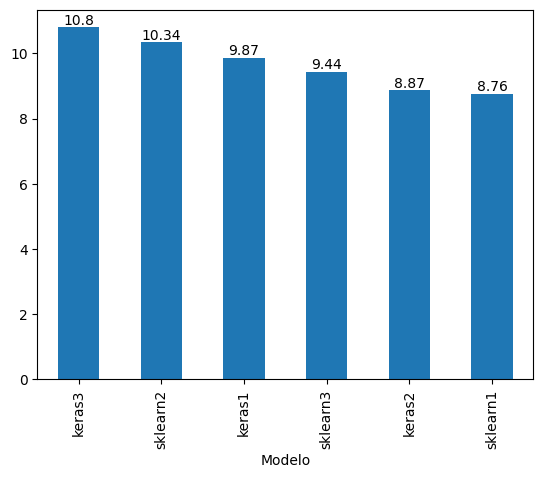

In [44]:
rmse_list = metrics_keras1['RMSE'], metrics_keras2['RMSE'], metrics_keras3['RMSE'], metrics_sklNN1['RMSE'], metrics_sklNN2['RMSE'], metrics_sklNN3['RMSE']
model_list = ['keras1', 'keras2', 'keras3', 'sklearn1', 'sklearn2', 'sklearn3']

df = pd.DataFrame({'Modelo': model_list, 'RMSE': rmse_list})
df = df.sort_values('RMSE', ascending=False)
ax = df.plot(kind='bar', x='Modelo', y='RMSE', legend=False)
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, round(height, 2), ha='center', va='bottom')
plt.show()